<a href="https://colab.research.google.com/github/7jadhavAbhi7/Devanagiri_Character_Classification/blob/master/Devanagiri_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

folder_path = "/content/Dev"

for file in os.listdir(folder_path):
    if file.endswith(".zip"):
        file_path = os.path.join(folder_path, file)
        extract_path = os.path.join(folder_path, os.path.splitext(file)[0])
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

print("All ZIP files extracted successfully!")

All ZIP files extracted successfully!


In [2]:
import os
import shutil

base_train_path = "/content/Dev/Train"
base_test_path = "/content/Dev/Test"
def fix_folder_structure(base_path):
    nested_path = os.path.join(base_path, os.path.basename(base_path))
    if os.path.exists(nested_path):
        for folder in os.listdir(nested_path):
            src = os.path.join(nested_path, folder)
            dst = os.path.join(base_path, folder)
            if os.path.isdir(src):
                shutil.move(src, dst)


        os.rmdir(nested_path)


fix_folder_structure(base_train_path)
fix_folder_structure(base_test_path)


✅ Fixed structure for /content/Dev/Train
✅ Fixed structure for /content/Dev/Test


In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

train_dir = "/content/Dev/Train"
test_dir = "/content/Dev/Test"

IMG_SIZE = (32, 32)
classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

def load_images_from_folder(folder, label_map):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, IMG_SIZE)
                    img = img / 255.0
                    images.append(img)
                    labels.append(label_map[class_name])
    return np.array(images), np.array(labels)


label_map = {class_name: i for i, class_name in enumerate(classes)}

X_train, y_train = load_images_from_folder(train_dir, label_map)
X_test, y_test = load_images_from_folder(test_dir, label_map)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print(" y_train shape:", y_train.shape)
print(" X_val shape:", X_val.shape)
print(" y_val shape:", y_val.shape)
print(" X_test shape:", X_test.shape)
print(" y_test shape:", y_test.shape)

X_train shape: (62560, 32, 32, 3)
 y_train shape: (62560,)
 X_val shape: (15640, 32, 32, 3)
 y_val shape: (15640,)
 X_test shape: (13800, 32, 32, 3)
 y_test shape: (13800,)


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
num_classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras import layers, callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

checkpoint = callbacks.ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True
)

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2,callbacks=[early_stopping, reduce_lr, checkpoint])

Epoch 1/15
1561/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9316 - loss: 0.2170

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9316 - loss: 0.2170 - val_accuracy: 0.9674 - val_loss: 0.1061 - learning_rate: 0.0010
Epoch 2/15
1554/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.1708

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9470 - loss: 0.1708 - val_accuracy: 0.9695 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 3/15
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9527 - loss: 0.1510 - val_accuracy: 0.9664 - val_loss: 0.1104 - learning_rate: 0.0010
Epoch 4/15
1557/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1179

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9618 - loss: 0.1180 - val_accuracy: 0.9746 - val_loss: 0.0842 - learning_rate: 0.0010
Epoch 5/15
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9653 - loss: 0.1080 - val_accuracy: 0.9746 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 6/15
1553/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9674 - loss: 0.0976

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9674 - loss: 0.0976 - val_accuracy: 0.9767 - val_loss: 0.0834 - learning_rate: 0.0010
Epoch 7/15
1548/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.0860

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9716 - loss: 0.0861 - val_accuracy: 0.9767 - val_loss: 0.0820 - learning_rate: 0.0010
Epoch 8/15
1562/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0743

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9751 - loss: 0.0744 - val_accuracy: 0.9769 - val_loss: 0.0860 - learning_rate: 0.0010
Epoch 9/15
1551/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0717

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9774 - loss: 0.0717 - val_accuracy: 0.9778 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 10/15
1551/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0694
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9774 - loss: 0.0694 - val_accuracy: 0.9780 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 11/15
1560/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0485

1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9828 - val_loss: 0.0699 - learning_rate: 5.0000e-04
Epoch 12/15
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9887 - loss: 0.0331 - val_accuracy: 0.9820 - val_loss: 0.0749 - learning_rate: 5.0000e-04
Epoch 13/15
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9815 - val_loss: 0.0720 - learning_rate: 5.0000e-04
Epoch 14/15
1561/1564 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0294
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


1564/1564 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accuracy: 0.9839 - val_loss: 0.0723 - learning_rate: 5.0000e-04
Epoch 15/15
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9837 - val_loss: 0.0735 - learning_rate: 2.5000e-04


432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0648

✅ Test Accuracy: 0.9816


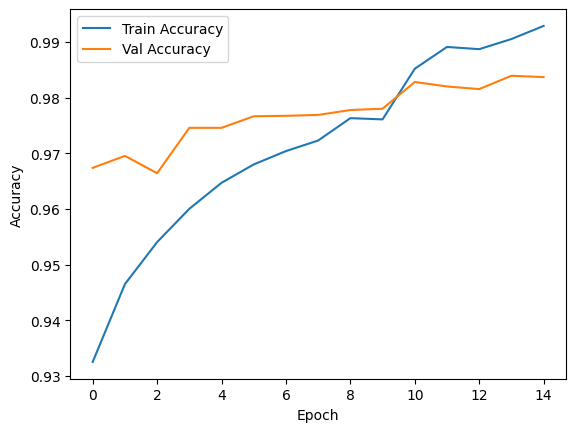

In [12]:
import matplotlib.pyplot as plt
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Plot Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

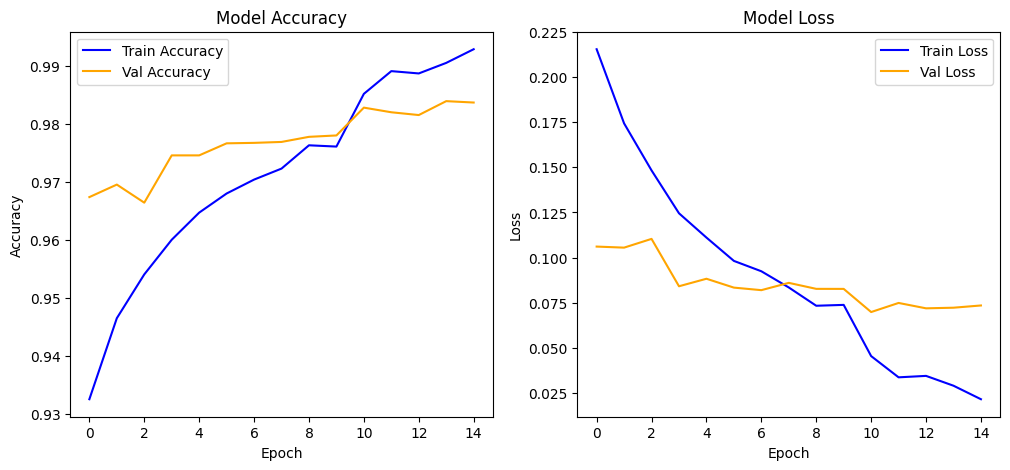

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy and Loss Curves
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Plot
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Loss Plot
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Val Loss', color='orange')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()


In [21]:
import os

train_path = "/content/Dev/Train"
class_labels = sorted(os.listdir(train_path))
index_to_class = {i: name.split('_')[-1] for i, name in enumerate(class_labels)}
print(index_to_class)

{0: 'yna', 1: 'taamatar', 2: 'thaa', 3: 'daa', 4: 'dhaa', 5: 'adna', 6: 'tabala', 7: 'tha', 8: 'da', 9: 'dha', 10: 'ka', 11: 'na', 12: 'pa', 13: 'pha', 14: 'ba', 15: 'bha', 16: 'ma', 17: 'yaw', 18: 'ra', 19: 'la', 20: 'waw', 21: 'kha', 22: 'motosaw', 23: 'petchiryakha', 24: 'patalosaw', 25: 'ha', 26: 'chhya', 27: 'tra', 28: 'gya', 29: 'ga', 30: 'gha', 31: 'kna', 32: 'cha', 33: 'chha', 34: 'ja', 35: 'jha', 36: '0', 37: '1', 38: '2', 39: '3', 40: '4', 41: '5', 42: '6', 43: '7', 44: '8', 45: '9'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


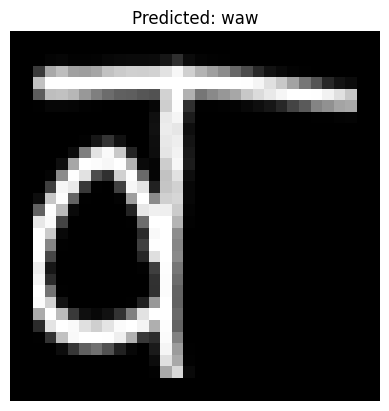

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model.h5')

# Load a random image
img_path = '/content/Dev/Test/character_29_waw/11476.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (32, 32))

img_array = img_resized.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]
predicted_label = index_to_class[predicted_class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()
